# Биномиальное распределение: практикум в Python

*Алла Тамбовцева*

## Биномиальное распределение

### Факториал

Импортируем функцию для вычисления факториала из модуля `math`:

In [1]:
from math import factorial

Посчитаем $n!$ для разных $n$:

In [2]:
factorial(4) # 4!

In [3]:
factorial(6) # 6!

In [4]:
factorial(100) # 100!

### Биномиальные коэффициенты

Для вычисления биномиального коэффициента $C_n^k$ нам потребуется модуль `special` из библиотеки для научных вычислений `scipy` (сокращение от  *SCIentific PYthon*). Импортируем его:

In [5]:
import scipy.special as sp

Теперь воспользуемся функцией `binom`, которая позволит посчитать нам биномиальный коэффициент. Для примера посчитаем биномиальный коэффициент $C_4^2$:

In [6]:
sp.binom(4, 2) # сначала указывается n, потом k

6.0

### Биномиальное распределение и биномиальные вероятности

Для создания биномиальной случайной величины и вычисления вероятностей ее значений нам понадобится модуль `stats` из той же библиотеки `scipy`. Импортируем его:

In [7]:
import scipy.stats as st

Создадим случайную величину $X$, имеющую биномиальное распределение с параметрами $n=10$, $p=0.5$, то есть величину, которая описывает число успехов в серии из $10$ испытаний Бернулли, где вероятность успеха в одном испытании равна $0.5$.

In [8]:
X = st.binom(n=10, p=0.5)

Теперь давайте построим ряд распределения этой случайной величины: соотнесем значения величины и их вероятности. Ясно, что значениями этой случайной величины являются целые числа от 0 до 10 включительно (число успехов в 10 испытаниях). Реализуем такой цикл: для каждого значения $k$ от 0 до 10 включительно будем считать вероятность $P(X=k)$ с помощью метода `.pmf()`.

In [9]:
for k in range(0, 11):  # все целые числа от 0 до 10
    print(k, X.pmf(k))

0 0.0009765625
1 0.00976562500000001
2 0.04394531249999999
3 0.11718750000000014
4 0.20507812500000022
5 0.24609375000000025
6 0.20507812500000022
7 0.11718750000000014
8 0.04394531249999999
9 0.00976562500000001
10 0.0009765625


Можем найти математическое ожидание и дисперсию этой случайной величины (о них поговорим позже):

In [10]:
X.expect() # E(X), expected value

5.000000000000005

In [11]:
X.var() # D(X)=Var(X), variance

2.5

Теперь мы можем решить какую-нибудь задачу.

**Задача**

Известно, что $70$% студентов очной формы обучения совмещают обучение
с работой. Для проведения интервью мы случайным образом выбираем $10$ студентов.

a. Какова вероятность того, что среди выбранных респондентов будет ровно $4$ работающих студента? 

b. Какова вероятность того, что среди выбранных респондентов будет не менее $8$
работающих студентов?

Одно испытание Бернулли – опрос одного студента. Успех – студент совмещает работу и учебу, неудача – не совмещает. $p=0.7$ и $q=0.3$. Раз опрашиваем $10$ студентов, имеем серию из $n=10$ испытаний Бернулли. Сгенерируем величину $X$, которая имеет биномиальное распределение с параметрами $n=10$, $p=0.7$.

In [12]:
x = st.binom(n=10, p=0.7)

a. $P(X = 4)$

In [13]:
x.pmf(4)  # pmf - от probability mass function

0.03675690900000004

b. $P(X \geq 8) = P(X=8) + P(X=9) + P(X=10)$

In [14]:
x.pmf(8) + x.pmf(9) + x.pmf(10)

0.3827827863999999

### Немного визуализации



Вероятности, посчитанные для значений биномиальной случайной величины, часто изображают на графике. Импортируем библиотеку `matplotlib`, а именно ее модуль `pyplot`, и заодно библиотеку `numpy`:

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
%matplotlib inline
# чтобы графики были прямо в файле

Зафикисируем параметры биномиальной случайной величины и посчитаем вероятности значений:

In [17]:
n, p = 10, 0.7 # параметры биномиального распределения

In [18]:
x = np.arange(0, n+1) # все значения СВ - целые от 0 до n включительно
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [19]:
prob = st.binom.pmf(x, n, p) # вероятности

Построим график:

* `vlines` – вертикальные линии
* `x` – значения СВ
* `prob` – вероятности значений СВ
* `colors` – цвета
* `lw` – ширина линий (line width)
* `alpha` – прозрачность

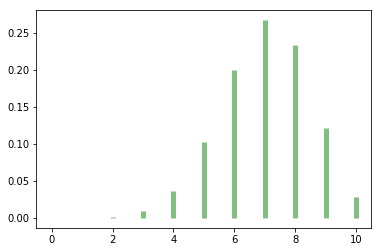

In [21]:
plt.vlines(x, 0, prob, colors='green', lw=5, alpha=0.5)

Так как вероятность успеха достаточно высокая (0.7), видно, что ситуации, когда мы получаем 0-3 успеха, маловероятны. Давайте теперь посмотрим на симметричное распределение, где $p=q=0.5$. 

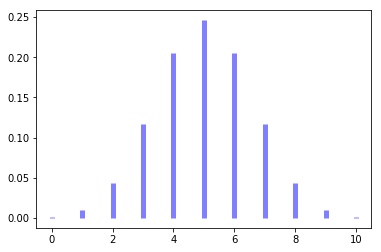

In [22]:
n, p = 10, 0.5
x = np.arange(0, n+1)
plt.vlines(x, 0, st.binom.pmf(x, n, p), colors='blue', lw=5, alpha=0.5)

Видно, что теперь график симметричен относительно среднего ожидаемого значения 5. Это логично: если вероятности успеха и неудачи одинаковы, то получить 4 успеха в 10 испытаниях – это то же самое, что получить 4 неудачи в 10 испытаниях, а 4 неудачи из 10 – это 6 успехов из 10. Поэтому $P(X=4) = P(X=6)$. Или, в общем случае, если $p=q=0.5$, то $P(X=k)=P(X=n-k).$

Теперь построим другой график – *многоугольник распределения*. Это график, по горизонтальной оси которого идут значения случайной величины в порядке возрастания, а по вертикальной – их вероятности, причем точки на графике соединены друг с другом. Построим многоугольник распределения для биномиальной случайной величины $X$ с $n=10$, $p=0.5$:

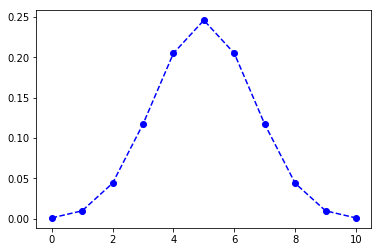

In [23]:
n, p = 10, 0.5
x = np.arange(0, n+1)
prob = st.binom.pmf(x, n, p)
plt.plot(x, prob, '--bo')

Многоугольник распределения можно построить для любой дискретной случайной величины, не только биномиальной. Достаточно иметь перед глазами ряд распределения – соответствие между значениями СВ и их вероятностями.

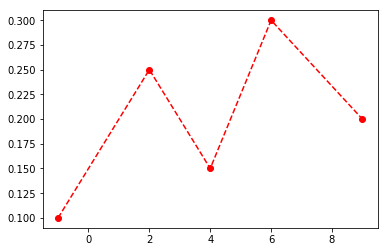

In [24]:
y = np.array([-1, 2, 4, 6, 9])  # значения Х
yp = np.array([0.1, 0.25, 0.15, 0.3, 0.2])  # вероятности X
plt.plot(y, yp, '--bo', color='r')